In [36]:
# this is using the hsnt kernel conda environment

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from __code.step1_prepare_ccd_images import Step1PrepareCcdImages


from __code import system

system.System.select_working_dir(facility='SNS', instrument='VENUS', ipts='IPTS-33531')
from __code.__all import custom_style
custom_style.style()

# <font color='red'>Input sample folder</font>

This folder will contains all the images (1 image per angle)

<font color='blue'><b>Instructions</b>: select folder containing projections</font>

In [37]:
o_white_beam = Step1PrepareCcdImages(system=system)
o_white_beam.select_top_sample_folder()

logging file: /SNS/VENUS/shared/log/step1_prepare_ccd_images.log
working_dir = '/SNS/VENUS/IPTS-33531'
Top sample folder selected: /SNS/VENUS/IPTS-33531/shared/processed_data/truck_CT_data/


# <font color='red'>Input Open Beam (OB) folder</font>

Select the images to use as OB

<font color='blue'><b>Instructions</b>: select individual images</font>

In [38]:
o_white_beam.select_ob_images()

top ob folder is: /SNS/VENUS/IPTS-33531/shared/processed_data/ob


# <font color='red'>Input Dark Current (DC) folder</font>

Select the images to use as DC

<font color='blue'><b>Instructions</b>: select individual images</font>

In [39]:
o_white_beam.select_dc_images()

top dc folder is: /SNS/VENUS/IPTS-33531/shared/processed_data/dc/45s


# <font color='red'>Define file naming schema</font>

This is needed to extract the angle value from the images file name

In [40]:
o_white_beam.define_naming_schema()

HTML(value='<b>Check the 2 fields to use to determine the angle value (degree.minutes)!</b>')

HTML(value="<font color='red'><b>ERROR</b>: Select 2 and only 2 checkboxes!</font>")

HTML(value='<hr>')

# <font color='red'>Percentage of data to use </font>

In [41]:
o_white_beam.select_percentage_of_data_to_use()

IntSlider(value=50, layout=Layout(width='100%'), min=1)

Label(value='90 images will be used for the reconstruction')

# <font color='red'>Load data</font>

This cell will load the data.

- <font color=blue><b>White beam</b></font>:
This step will add all the counts within a given run, making it feel like the data were acquired in white beam mode, loosing the time-of-flight (TOF) information.

This step will also sort the runs by increasing angle value.

<font size=1 color='red'><u>Developer Notes</u>: this step will create the following:
- dictionary <i>master_3d_data_array</i>
- <i>list_of_images</i> listing the tiff files)
- <i>final_list_of_angles</i> and <i> final_list_of_angles_rad</i> with list of angles

In [42]:
o_white_beam.load_data()

ValueError: You need to select 2 fields to determine the angle value (degree.minutes)

<hr><hr style="border-bottom: dotted 1px;" />
<font color='purple' size='5'>Visualization</font><font color='purple' size='3'> - OPTIONAL</font>

Select the mode you want to use:
 - all images <b>(this may take a long time to process !)</b>
 - visual verification of raw, ob and dc

In [ ]:
o_white_beam.how_to_visualize()

In [ ]:
o_white_beam.visualize_raw_data()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Crop the raw data</font><font color='purple' size='3'> - OPTIONAL</font>

<font size=1 color='red'><u>Developer Notes</u>: this step will update the dictionary <i>master_3d_data_array</i>

In [8]:
o_white_beam.pre_processing_crop_settings()

interactive(children=(IntSlider(value=200, description='left', layout=Layout(width='100%'), max=9599), IntSlid…

execute the cropping

In [9]:
o_white_beam.pre_processing_crop()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Remove outliers</font><font color='purple' size='3'> - OPTIONAL</font>

Three algorithms are provided:

* using `in-house` method with histogram (remove dead pixels and abnormal very high counts)
* using Tomopy `remove_outlier` method (remove high intensity bright spots)
* using Scipy `gamma_filter` method

<font color='blue'><b>Instructions</b>: select the algorithms you want to use.

<font size=1 color='red'><u>Developer Notes</u>: this step will update the dictionary <i>master_3d_data_array</i>

In [10]:
o_white_beam.clean_images_settings()

The next cell will be ignored if you didn't select <b>histogram</b>. 

<font color='blue'><b>Instructions</b>: if using the <b>histogram</b> algorithm, by default, all the pixels found in the first and last bin are considered as **bad** pixels. You have the option to change those settings. </font>

In [11]:
o_white_beam.clean_images_setup()

HTML(value='<h2> Tomopy settings </h2>')

FloatSlider(value=20.0, description='Diff value', min=1.0)

Launch the cleaning

In [12]:
o_white_beam.clean_images()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='purple' size='5'>Visualization</font><font color='purple' size='3'> - OPTIONAL</font>

Select the mode you want to use:
 - all images <b>(this may take a long time to process !)</b>
 - visual verification of raw, ob and dc

### How do you want to visualize the cleaned data?

In [13]:
o_white_beam.how_to_visualize_after_cleaning()

ToggleButtons(index=1, options=('All images', 'Statistics'), value='Statistics')

Launch the visualization

In [ ]:
o_white_beam.visualize_cleaned_data()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Rebin pixels</font><font color='purple' size='3'> - OPTIONAL</font>

Under Construction

<hr style="border-bottom: dotted 1px;" />
<hr style="height: 2px" />

# <font color='red'>Normalization</font>


<font color='blue'><b>Instructions</b>: in order to improve the normalization, you can turn ON/OFF any of the following 

- <font color=red><b>use proton charge</b></font>: that option will use the proton charge value requested for each runs and open beams and will bring them to the same value by applying a coefficient corector to the data.
- <font color=red><b>use background region of interest (ROI)</b></font>: select a region that does not contain any part of the sample in order to match the counts with the same ROI of the open beam.</font>

<font size=1 color='red'><u>Developer Notes</u>: this step will create the 3d array <i>normalized_images</i>

In [14]:
o_white_beam.normalization_settings()

This next cell will allow you to select the background region within the projections images, or will just be ignored if you not chose to use it.

<font color='blue'><b>Instructions</b>: define ROI

Make sure you select a region <font color='red'> OUTSIDE</font> of your sample

<img src="__code/__all/demo_of_roi_selection.gif" width="50%" />

NB: The next cell will be ignored if you didn't select <b>Use ROI</b>

In [15]:
o_white_beam.normalization_select_roi()

interactive(children=(IntSlider(value=0, description='left', max=9599), IntSlider(value=549, description='righ…

This cell will perform the normalization using any of the settings you define just above.

In [16]:
o_white_beam.normalization()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Visualize normalized data</font><font color='purple' size='3'> - OPTIONAL</font>

In [17]:
o_white_beam.visualization_normalization_settings()

ToggleButtons(description='How to plot?', options=('1 image at a time', 'All images'), value='1 image at a tim…

In [18]:
o_white_beam.visualize_normalization()

interactive(children=(IntSlider(value=0, description='image_index', max=180), IntSlider(value=0, description='…

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Export the normalized data</font><font color='purple' size='3'> - OPTIONAL</font>


Select the folder where to export the normalized images


In [ ]:
o_white_beam.select_export_normalized_folder()

Run this cell to execute the export of the normalized images


In [ ]:
o_white_beam.export_normalized_images()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Crop the data</font><font color='purple' size='3'> - OPTIONAL</font>

<font size=1 color='red'><u>Developer Notes</u>: this step will update the 3d array <i>normalized_images</i>

In [ ]:
o_white_beam.crop_settings()

execute the cropping

In [56]:
o_white_beam.crop()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Rotate the data</font><font color='purple' size='3'> - OPTIONAL</font>

<font color='blue'>The reconstruction algorithm will ONLY work if the rotation axis is VERTICAL</font>!

select the angle to use!

<font size=1 color='red'><u>Developer Notes</u>: this step will update the 3d array <i>normalized_images_log</i>

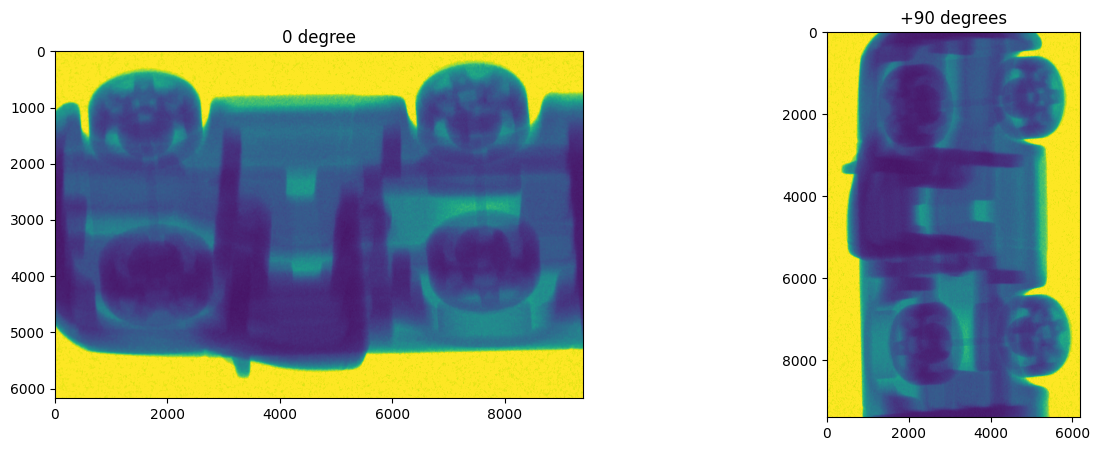

In [19]:
o_white_beam.rotate_data_settings()

Run to perform the transformation by the angle specified

In [20]:
o_white_beam.apply_rotation()

Vizualize the images after rotation - OPTIONAL

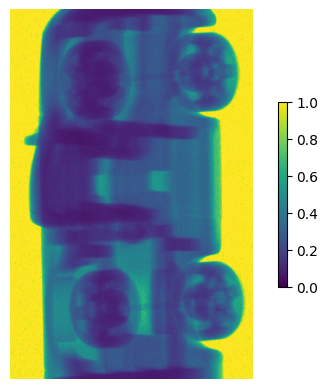

In [21]:
o_white_beam.visualize_after_rotation()

<hr style="border-bottom: dotted 1px;" />
<hr style="height: 2px" />

# <font color='red'>Minus log conversion</font>

<font size=1 color='red'><u>Developer Notes</u>: this step will create the 3d array <i>normalized_images_log</i>

In [22]:
o_white_beam.log_conversion_and_cleaning()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='purple' size='3'>Visualization</font><font color='purple' size='3'> - OPTIONAL</font>


In [23]:
o_white_beam.visualize_images_after_log()

interactive(children=(IntSlider(value=0, description='index', max=180), Output()), _dom_classes=('widget-inter…

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Remove stripes</font><font color='purple' size='3'> - OPTIONAL</font>

Run if you want to remove any stripes causing ring artifacs in the reconstruction

<font size=1 color='red'><u>Developer Notes</u>: this step will update the 3d array <i>normalized_images_log</i>

In [ ]:
o_white_beam.select_remove_strips_algorithms()

Define the settings for the algorithms you chose in the previous cell

In [ ]:
o_white_beam.define_settings()

perform the cleaning

In [ ]:
o_white_beam.remove_strips()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='purple' size='3'>Visualization</font><font color='purple' size='3'> - OPTIONAL</font>

In [ ]:
o_white_beam.display_removed_strips()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Calculate and apply tilt correction</font><font color='purple' size='3'> - OPTIONAL</font>

The algorithm will determine the 0 and 180 degrees runs and use those to calculate the <b>tilt</b> then apply it on the volume.
<br><br>

<font color='blue'><b>Instructions</b>: first, you need to select an vertical range contaning the sample

<font color='blue'>TIPS</font> - Make sure the sample is within the range defined

<font size=1 color='red'><u>Developer Notes</u>: this step will update the 3d array <i>normalized_images_log</i>

In [24]:
o_white_beam.select_sample_roi()

interactive(children=(IntSlider(value=0, description='y_top', max=9399), IntSlider(value=9399, description='y_…

Perform the calculation of the tilt and apply it

> Finding the rotation axis position...
Rotation axis Found!
offset = -105.5    tilt angle = -2.534794887436277 °
average of residuals  =  0.07066527


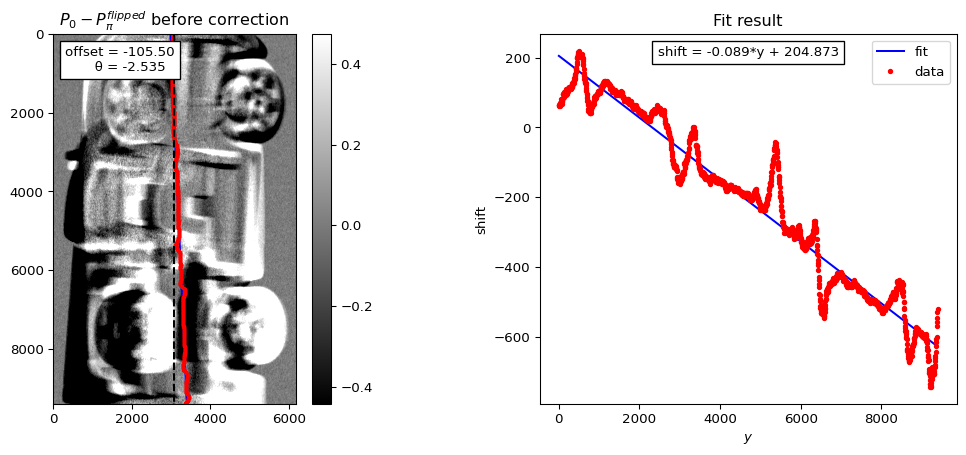

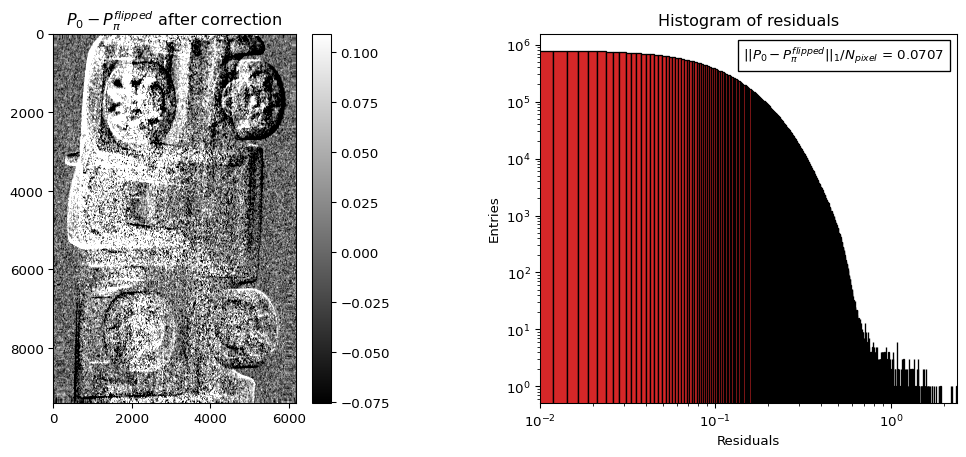

> Correcting rotation axis misalignment...


100%|██████████| 181/181 [01:51<00:00,  1.62 images/s]


In [25]:
o_white_beam.perform_tilt_correction()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Calculate center of rotation</font><font color='purple' size='3'> - OPTIONAL</font>

The algorithm will determine the 0 and 180 degrees runs and use those to calculate the <b>center of rotation</b> 

<font size=1 color='red'><u>Developer Notes</u>: this step will use the 3d array <i>normalized_images_log</i>

In [26]:
o_white_beam.center_of_rotation_settings()

RadioButtons(options=('Automatic', 'Manual'), value='Automatic')

Select the mode you want to use to calculate the **center of rotation**

* **automatic mode** will use the [algotom](https://algotom.github.io) library
* **manual mode** will let you figure out the center of rotation

<font color=red>NB</font>: if you selected **automatic mode**, first, you will need to select the 180 or 360 degrees mode to use to estimate the center of rotation.

In [27]:
o_white_beam.run_center_of_rotation()

HTML(value='Select the slice to use to calculate the center of rotation')

interactive(children=(IntSlider(value=4700, description='slice_value', max=9399), FloatSlider(value=0.0, descr…

HTML(value='Horizontal line shows the slide used to calculate the center of rotation')

HTML(value='<hr>')

HTML(value='Do you want to use all the data from 0 to 180, or 0 to 360 degrees to calculate the center of rota…

RadioButtons(options=('180 degree', '360 degree'), value='180 degree')

In [28]:
o_white_beam.perform_calculation_of_center_of_rotation()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Test reconstruction</font><font color='purple' size='3'> - OPTIONAL</font>

<b>Select a couple of slices to use to reconstruct</b>. 

This will allow to test:
- the calculation of the center of rotation
- tilt angle value
- cleaning of the data (outlisers, stripes)
- more ...

In [29]:
o_white_beam.select_slices_to_use_to_test_reconstruction()

interactive(children=(IntSlider(value=0, description='image_index', max=180), IntSlider(value=400, description…

Perform the reconstruction on those slices

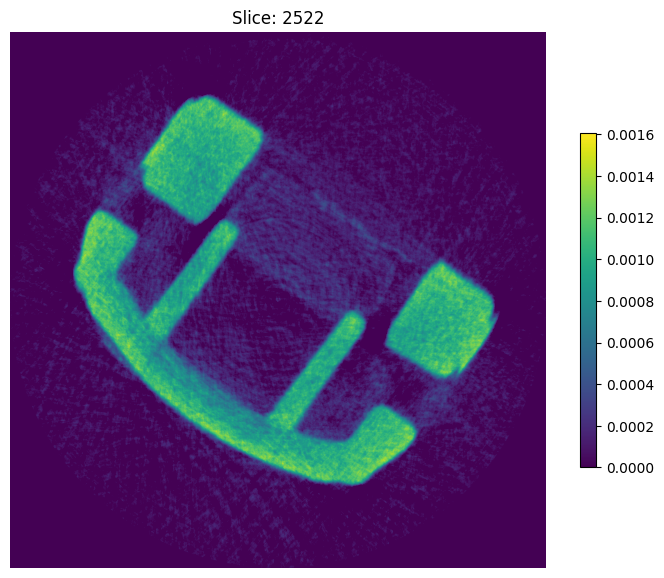

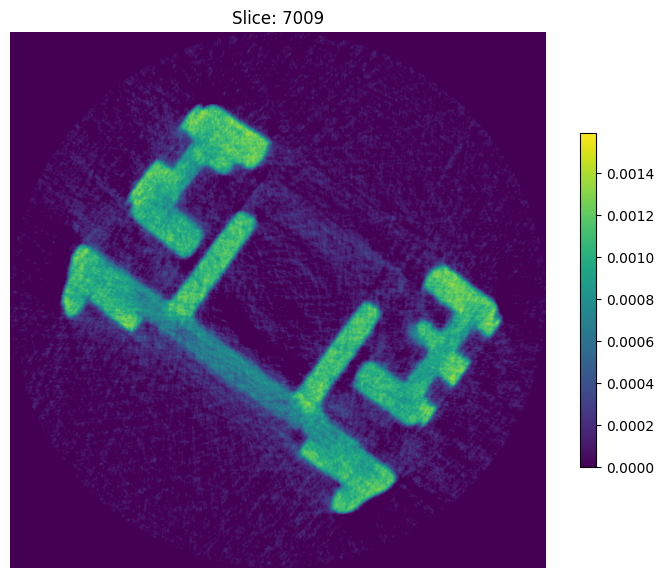

In [30]:
o_white_beam.run_reconstruction_of_slices_to_test()

<hr style="border-bottom: dotted 1px;" /><hr style="height: 2px" />

In [32]:
# debug
import algotom.rec.reconstruction as rec
import numpy as np

In [34]:
o_white_beam.final_list_of_angles_rad

array([0.        , 0.        , 0.        , 0.01745329, 0.01745329,
       0.03490659, 0.05235988, 0.05235988, 0.05235988, 0.06981317,
       0.06981317, 0.06981317, 0.08726646, 0.13962634, 0.13962634,
       0.15707963, 0.15707963, 0.17453293, 0.20943951, 0.20943951,
       0.2268928 , 0.26179939, 0.27925268, 0.27925268, 0.27925268,
       0.29670597, 0.29670597, 0.31415927, 0.34906585, 0.38397244,
       0.38397244, 0.40142573, 0.40142573, 0.41887902, 0.43633231,
       0.45378561, 0.4712389 , 0.48869219, 0.57595865, 0.57595865,
       0.62831853, 0.64577182, 0.64577182, 0.66322512, 0.6981317 ,
       0.71558499, 0.80285146, 0.80285146, 0.82030475, 0.82030475,
       0.83775804, 0.85521133, 0.87266463, 0.90757121, 0.9250245 ,
       0.95993109, 0.99483767, 1.01229097, 1.01229097, 1.01229097,
       1.04719755, 1.04719755, 1.06465084, 1.09955743, 1.11701072,
       1.13446401, 1.15191731, 1.1693706 , 1.1693706 , 1.18682389,
       1.18682389, 1.22173048, 1.23918377, 1.29154365, 1.36135

In [ ]:

volume = o_white_beam.normalized_images_log
# np.shape(volume)

recon = rec.astra_reconstruction(volume,
                                 3074,
                                 angles=o_white_beam.final_list_of_angles_rad,
                                 apply_log=False,
                                 method='SART_CUDA',
                                 ratio=1.0,
                                 filter_name='hann',
                                 pad=None,
                                 num_iter=300,
                                 ncore=60)




KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(recon[0], cmap='jet')

# <font color='red'>Select reconstruction method(s)</font>

In [ ]:
o_white_beam.select_reconstruction_method()

# <font color='red'>Set up reconstruction parameters</font>

<font color='blue'><b>Instructions</b>: 

- define the reconstruction settings (keeping the <b>default values</b> is a good choice for novice users)</font>



In [71]:
o_white_beam.reconstruction_settings()

# <font color='red'>Create config file and export pre-processed images</font>

* <b>config file</b> will be used in the next step (step1_####.json)
* <b>log file</b> to check the full process up to here
* <b>stack of projectons ready to be reconstructed</b>

In [ ]:
o_white_beam.select_export_extra_files()

In [ ]:
o_white_beam.export_extra_files(prefix='step1')

<hr style="border-bottom: dotted 1px;" /><hr>